### Exploratory Data Analysis and Principal Component Ananlysis of the Physionet Heart Failure dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set styling for plots
plt.style.use('ggplot')
sns.set_theme(font_scale=1.2)
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('dat.csv')

#### Basic dataset info

In [5]:
print(f"Dataset shape: {df.shape}")
print(f"\nTarget variable distribution:")
print(df['re.admission.within.6.months'].value_counts(normalize=True).mul(100).round(2))

Dataset shape: (2008, 167)

Target variable distribution:
re.admission.within.6.months
0    61.5
1    38.5
Name: proportion, dtype: float64


In [6]:
def display_df(df_to_display, max_rows=10, max_cols=None):
    with pd.option_context('display.max_rows', max_rows, 'display.max_columns', max_cols):
        display(df_to_display)

### Basic Data Exploration

In [9]:
print("="*50)
print("Data Overview")
print("="*50)

print("\nFirst 5 rows of the dataset:")
display_df(df.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
display_df(df.describe())

# Check data types
print("\nData types of columns:")
display_df(pd.DataFrame(df.dtypes, columns=['Data Type']))

Data Overview

First 5 rows of the dataset:


,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,NaN,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.


Summary statistics of numerical columns:


,Unnamed: 0,inpatient.number,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,eye.opening,verbal.response,movement,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay
count,2008.00000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2006.000000,2008.000000,2006.000000,2008.000000,2008.0,2008.000000,2008.000000,2007.000000,2008.000000,2003.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,635.000000,1311.000000,980.000000,550.000000,393.000000,790.000000,182.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,44.000000,901.000000,2007.000000,897.000000,1985.000000,1985.000000,1985.000000,1945.000000,1967.000000,1981.000000,1981.000000,1981.000000,1981.000000,1978.000000,1978.000000,1980.000000,1980.000000,1981.000000,1980.000000,1981.000000,1905.000000,1981.000000,1981.000000,1981.000000,1981.000000,1980.000000,1981.000000,1905.000000,1905.000000,1981.000000,1981.000000,1840.000000,1973.00000,1974.000000,1974.000000,1962.000000,1973.000000,1974.000000,1929.00000


Data types of columns:


,Data Type
Unnamed: 0,int64
inpatient.number,int64
DestinationDischarge,object
admission.ward,object
admission.way,object
...,...
free.calcium,float64
total.hemoglobin,float64
GCS,int64
dischargeDay,int64


### Missing value analysis

Missing Values Analysis

Total missing values: 63753 out of 335336 cells (19.0117%)
Columns with 0%-5% missing: 43
Columns with 5%-10% missing: 18
Columns with 10%-20% missing: 7
Columns with 20%-50% missing: 4
Columns with 50%-80% missing: 33
Columns with >80% missing: 11

Top 20 columns with highest percentage of missing values:


,Missing Values,Percentage (%)
cholinesterase,2008,100.000000
respiratory.support.,1966,97.908367
time.of.death..days.from.admission.,1964,97.808765
homocysteine,1862,92.729084
apolipoprotein.B,1832,91.235060
...,...,...
LVEF,1373,68.376494
tricuspid.valve.return.velocity,1218,60.657371
time.to.emergency.department.within.6.months,1111,55.328685
re.admission.time..days.from.admission.,1107,55.129482



Missingness by data category:


,Category,Total Cells,Missing Cells,Missing Percentage
4,Cardiac Measures,14056,9215,65.559192
3,Lab Values,26104,1451,5.558535
0,Demographics,12048,27,0.224104
2,Comorbidities,34136,10,0.029295
1,Clinical Assessment,22088,0,0.000000


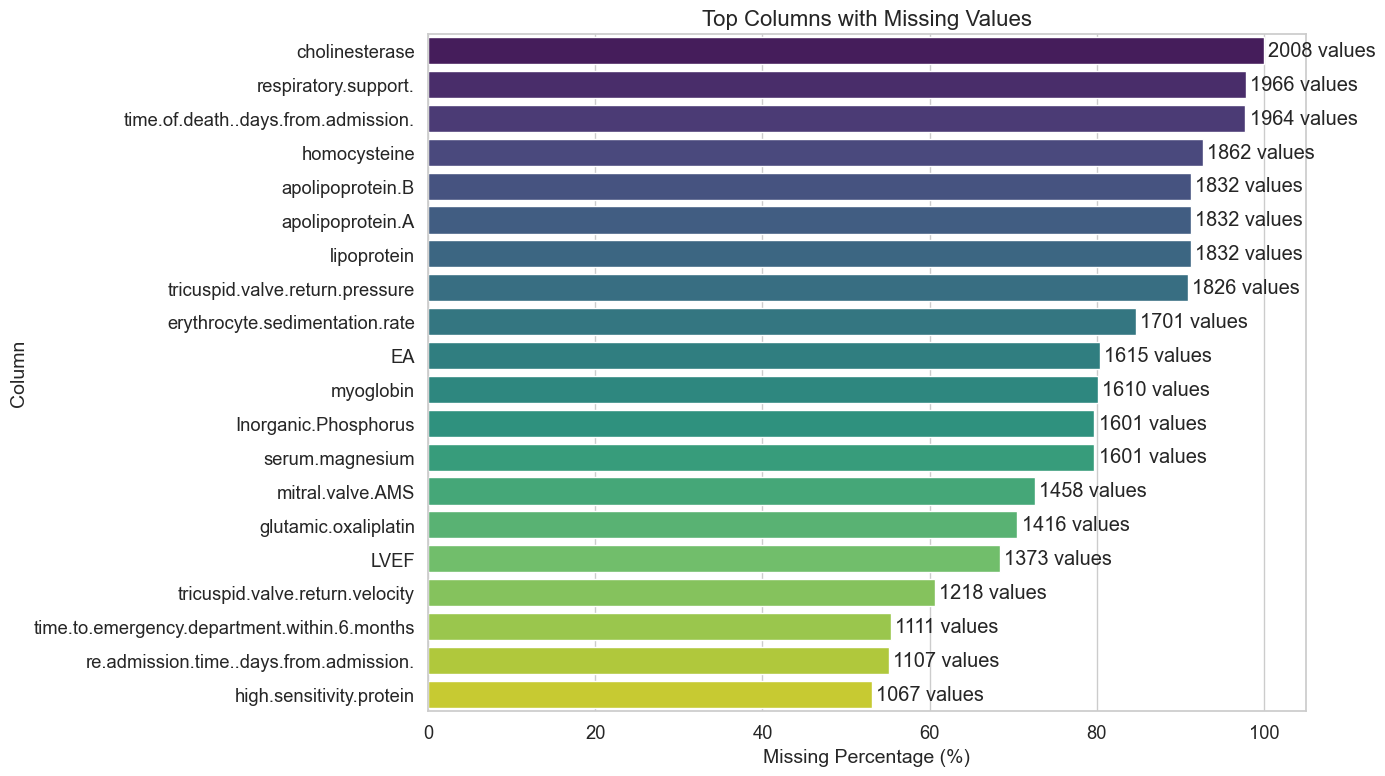

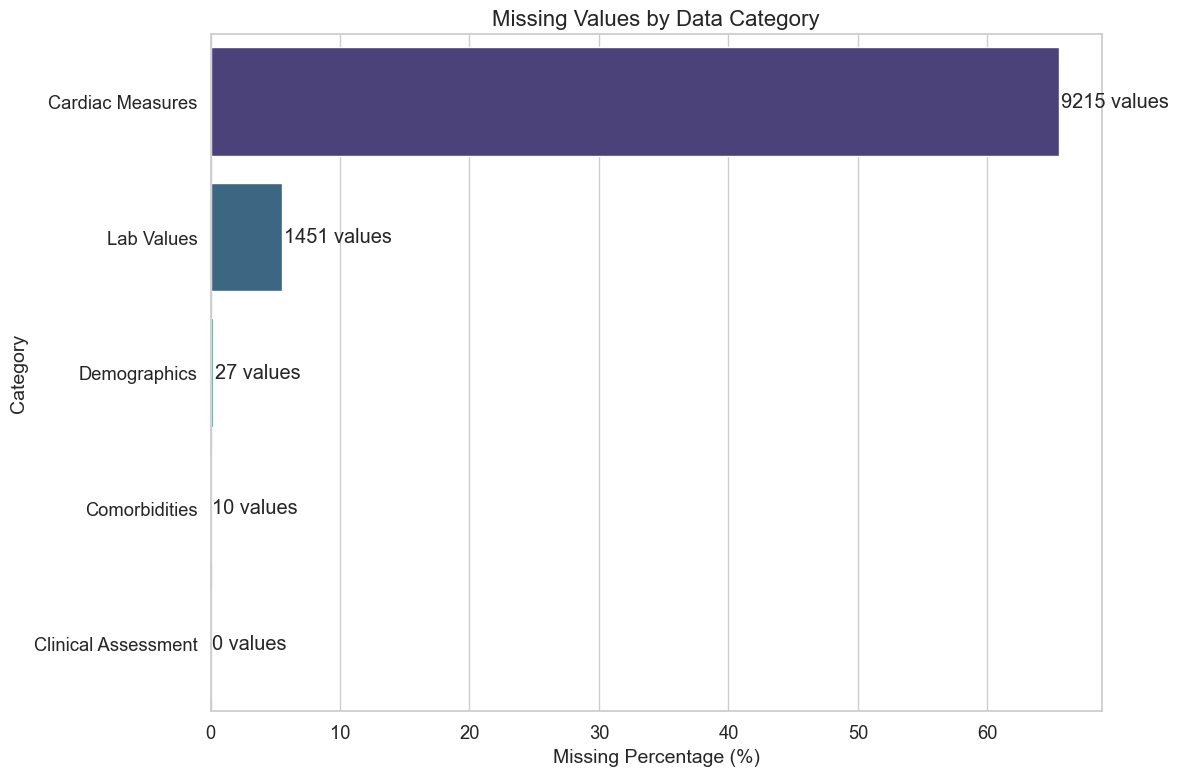

<Figure size 1800x1000 with 0 Axes>

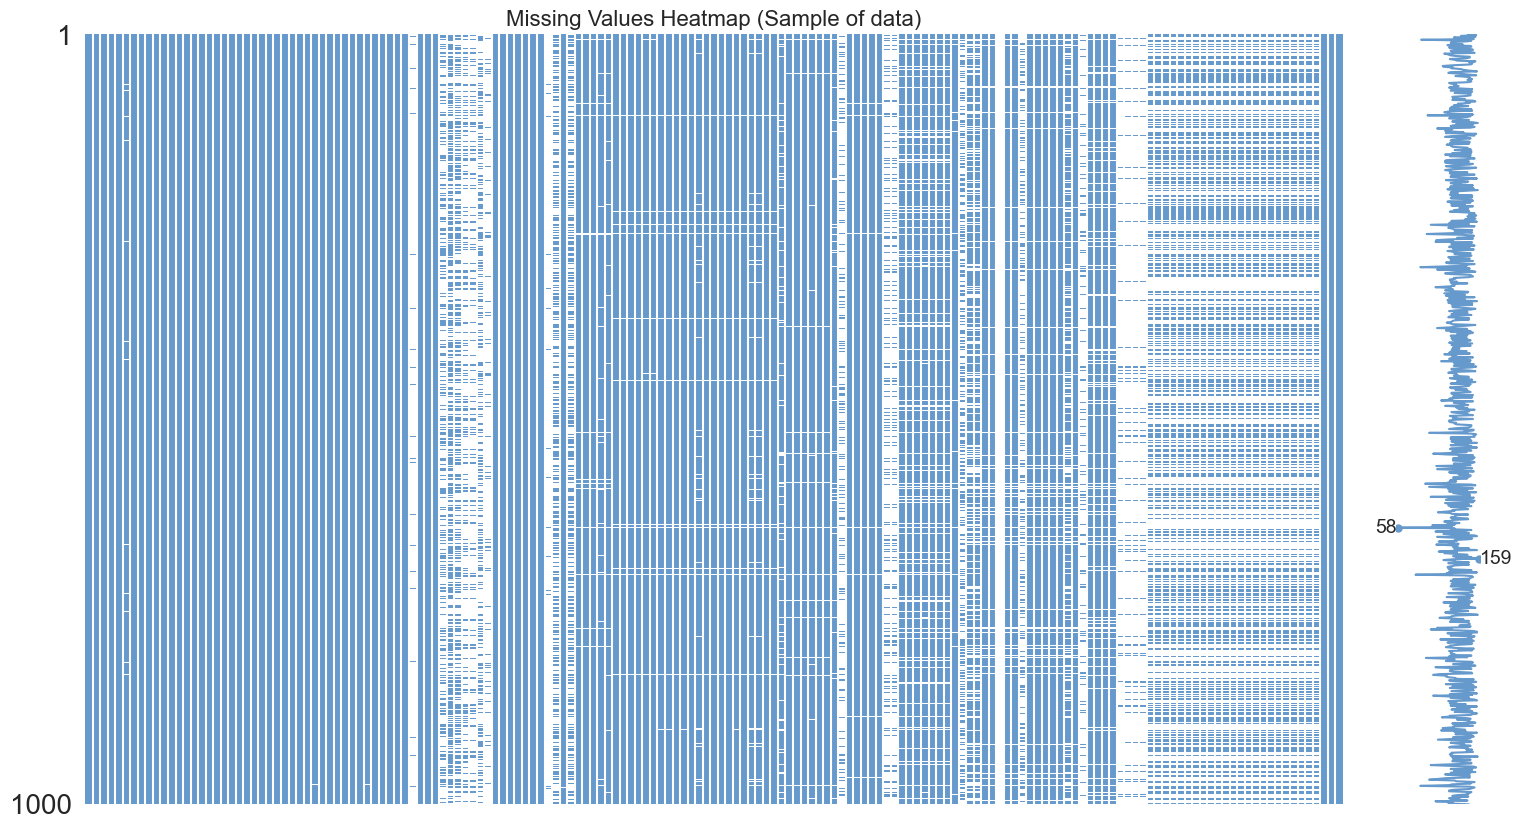

<Figure size 1600x1200 with 0 Axes>

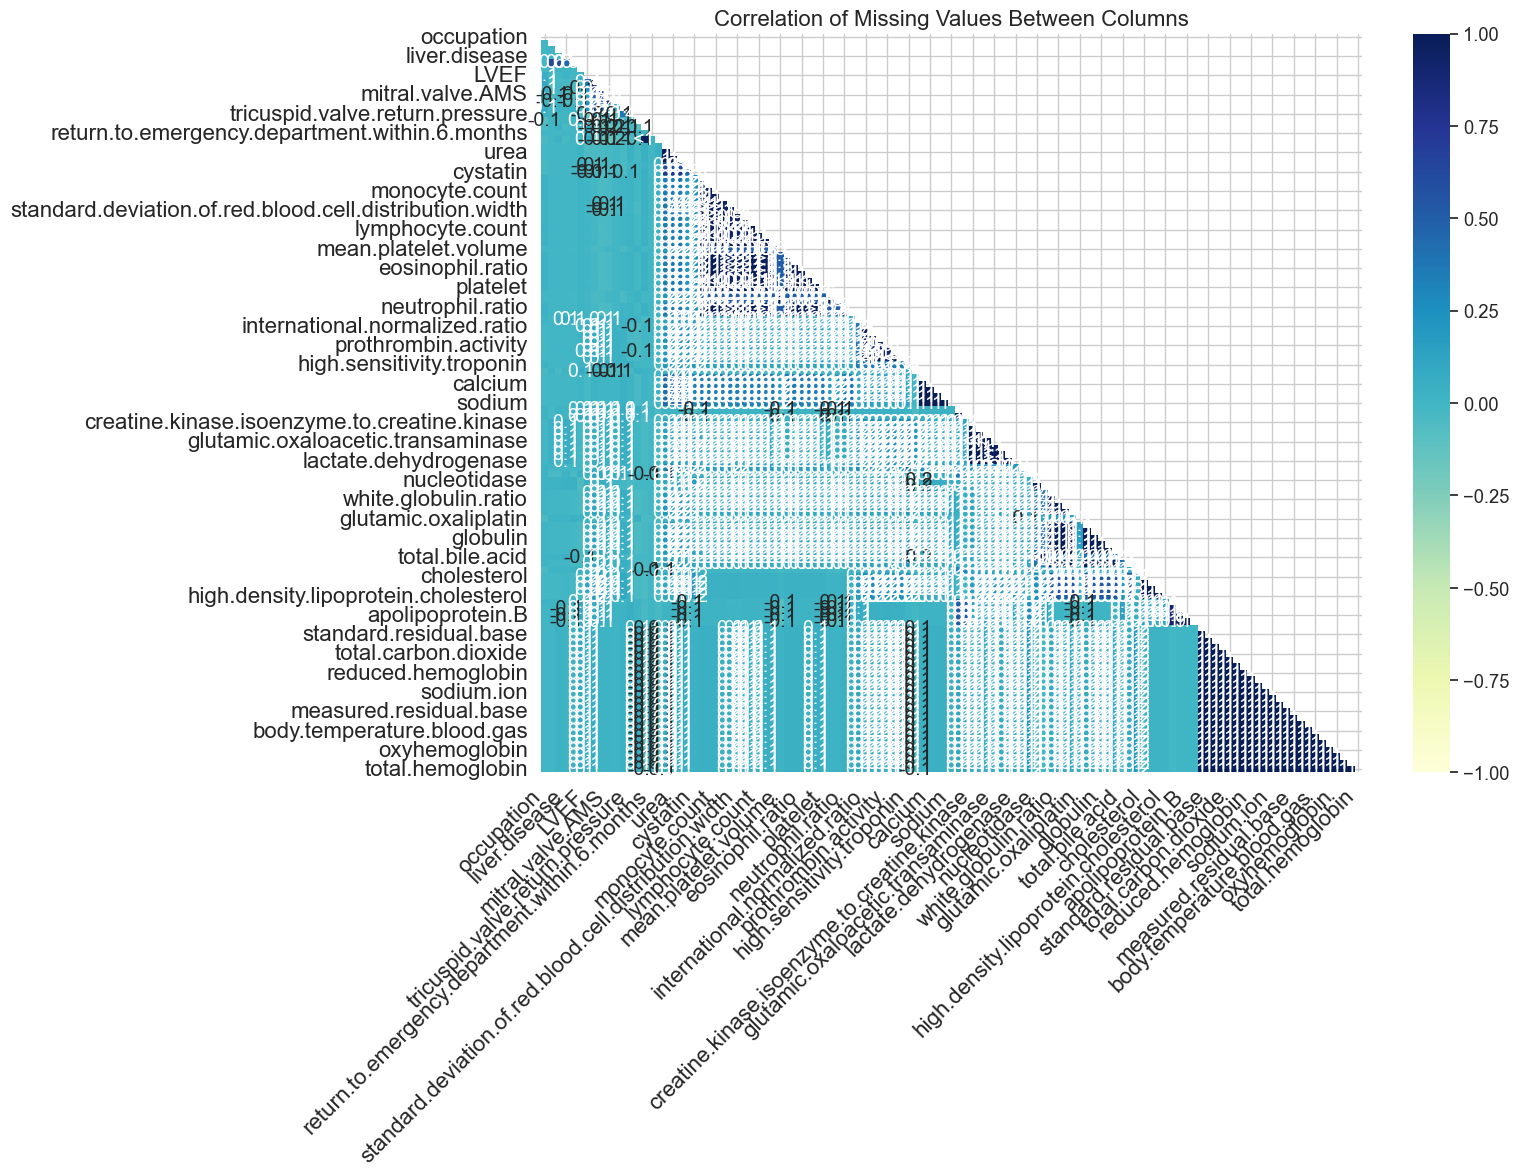


Relationship between missing values and readmission:

cholinesterase:
Readmission rate when value is present: Data not available
Readmission rate when value is missing: 38.50% (if available)

respiratory.support.:
Readmission rate when value is present: 30.95%
Readmission rate when value is missing: 38.66% (if available)

time.of.death..days.from.admission.:
Readmission rate when value is present: 6.82%
Readmission rate when value is missing: 39.21% (if available)

homocysteine:
Readmission rate when value is present: 36.99%
Readmission rate when value is missing: 38.61% (if available)

apolipoprotein.B:
Readmission rate when value is present: 35.23%
Readmission rate when value is missing: 38.81% (if available)

apolipoprotein.A:
Readmission rate when value is present: 35.23%
Readmission rate when value is missing: 38.81% (if available)

lipoprotein:
Readmission rate when value is present: 35.23%
Readmission rate when value is missing: 38.81% (if available)

tricuspid.valve.return.pre

In [14]:
print("="*50)
print("Missing Values Analysis")
print("="*50)

# Calculate missing values per column
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})
missing_values_df = missing_values_df.sort_values('Percentage (%)', ascending=False)

# Display overall missingness statistics
total_cells = np.prod(df.shape)
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing} out of {total_cells} cells ({total_missing/total_cells:.4%})")

# Count columns with missing values at different thresholds
thresholds = [0, 5, 10, 20, 50, 80]
for i in range(len(thresholds)-1):
    count = ((missing_values_percentage > thresholds[i]) & (missing_values_percentage <= thresholds[i+1])).sum()
    print(f"Columns with {thresholds[i]}%-{thresholds[i+1]}% missing: {count}")
count = (missing_values_percentage > thresholds[-1]).sum()
print(f"Columns with >{thresholds[-1]}% missing: {count}")

# Display columns with missing values
print("\nTop 20 columns with highest percentage of missing values:")
display_df(missing_values_df.head(20))

# Group missing values by data categories
column_categories = {
    'Demographics': ['gender', 'ageCat', 'occupation', 'BMI', 'weight', 'height'],
    'Clinical Assessment': ['NYHA.cardiac.function.classification', 'type.of.heart.failure', 'Killip.grade', 
                           'systolic.blood.pressure', 'diastolic.blood.pressure', 'pulse', 'respiration', 
                           'body.temperature', 'map', 'consciousness', 'GCS'],
    'Comorbidities': ['myocardial.infarction', 'congestive.heart.failure', 'peripheral.vascular.disease', 
                      'cerebrovascular.disease', 'dementia', 'Chronic.obstructive.pulmonary.disease', 
                      'connective.tissue.disease', 'peptic.ulcer.disease', 'diabetes', 
                      'moderate.to.severe.chronic.kidney.disease', 'hemiplegia', 'leukemia', 
                      'malignant.lymphoma', 'solid.tumor', 'liver.disease', 'AIDS', 'CCI.score'],
    'Lab Values': ['hemoglobin', 'white.blood.cell', 'platelet', 'sodium', 'potassium', 'chloride', 
                  'creatinine.enzymatic.method', 'glomerular.filtration.rate', 'urea', 'uric.acid',
                  'brain.natriuretic.peptide', 'high.sensitivity.protein', 'albumin'],
    'Cardiac Measures': ['LVEF', 'left.ventricular.end.diastolic.diameter.LV', 'tricuspid.valve.return.velocity', 
                        'tricuspid.valve.return.pressure', 'mitral.valve.EMS', 'mitral.valve.AMS', 'EA']
}

# Calculate missingness by category
category_missingness = {}
for category, cols in column_categories.items():
    # Filter to columns that exist in the dataset
    existing_cols = [col for col in cols if col in df.columns]
    if not existing_cols:
        continue
        
    # Calculate missingness
    category_df = df[existing_cols]
    total_cells = np.prod(category_df.shape)
    missing_cells = category_df.isnull().sum().sum()
    category_missingness[category] = {
        'total_cells': total_cells,
        'missing_cells': missing_cells,
        'missing_percentage': missing_cells / total_cells * 100 if total_cells > 0 else 0
    }

# Display missingness by category
print("\nMissingness by data category:")
category_miss_df = pd.DataFrame({
    'Category': list(category_missingness.keys()),
    'Total Cells': [info['total_cells'] for info in category_missingness.values()],
    'Missing Cells': [info['missing_cells'] for info in category_missingness.values()],
    'Missing Percentage': [info['missing_percentage'] for info in category_missingness.values()]
}).sort_values('Missing Percentage', ascending=False)
display_df(category_miss_df)

# Plot missing values by column
plt.figure(figsize=(14, 8))
missing_values_df_plot = missing_values_df[missing_values_df['Missing Values'] > 0].head(20)
if len(missing_values_df_plot) > 0:
    ax = sns.barplot(x='Percentage (%)', y=missing_values_df_plot.index, data=missing_values_df_plot, palette='viridis')
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        ax.text(width + 0.5, p.get_y() + p.get_height()/2, f'{missing_values_df_plot["Missing Values"].iloc[i]} values', 
               ha='left', va='center')
    plt.title('Top Columns with Missing Values', fontsize=16)
    plt.xlabel('Missing Percentage (%)', fontsize=14)
    plt.ylabel('Column', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to plot")

# Plot missing values category distribution
if category_miss_df['Missing Cells'].sum() > 0:
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Missing Percentage', y='Category', data=category_miss_df, palette='viridis')
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height()/2, f'{category_miss_df["Missing Cells"].iloc[i]} values', 
               ha='left', va='center')
    plt.title('Missing Values by Data Category', fontsize=16)
    plt.xlabel('Missing Percentage (%)', fontsize=14)
    plt.ylabel('Category', fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot missing values heatmap - visual representation of missingness patterns
plt.figure(figsize=(18, 10))
msno.matrix(df.sample(min(1000, len(df))), figsize=(18, 10), color=(0.4, 0.6, 0.8))
plt.title('Missing Values Heatmap (Sample of data)', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

# Plot correlation of missingness across columns
# This helps identify if missing values in one column correlate with missing values in another
if missing_values.sum() > 0:
    plt.figure(figsize=(16, 12))
    msno.heatmap(df, figsize=(16, 12), cmap="YlGnBu")
    plt.title('Correlation of Missing Values Between Columns', fontsize=16)
    plt.tight_layout()
    plt.show()
    
target_col = 're.admission.within.6.months'

# Analyze if missingness is related to the target variable
if missing_values.sum() > 0:
    print("\nRelationship between missing values and readmission:")
    columns_with_missing = missing_values_df[missing_values_df['Missing Values'] > 0].index.tolist()
    
    for col in columns_with_missing[:10]:  # Analyze top 10 columns with missing values
        # Create missingness indicator
        df[f'{col}_is_missing'] = df[col].isnull().astype(int)
        
        # Calculate readmission rate by missingness
        missing_cross = pd.crosstab(
            df[f'{col}_is_missing'], 
            df[target_col], 
            normalize='index'
        ) * 100
        
        print(f"\n{col}:")
        if 0 in missing_cross.index:
            print(f"Readmission rate when value is present: {missing_cross.loc[0, 1]:.2f}%")
        else:
            print("Readmission rate when value is present: Data not available")
        
        if 1 in missing_cross.index:
            print(f"Readmission rate when value is missing: {missing_cross.loc[1, 1]:.2f}% (if available)")
        else:
            print("Readmission rate when value is missing: Data not available")
        
        # Remove temporary column
        df.drop(f'{col}_is_missing', axis=1, inplace=True)
else:
    print("\nThe dataset is complete with no missing values.")



Target Variable Analysis: re.admission.within.6.months


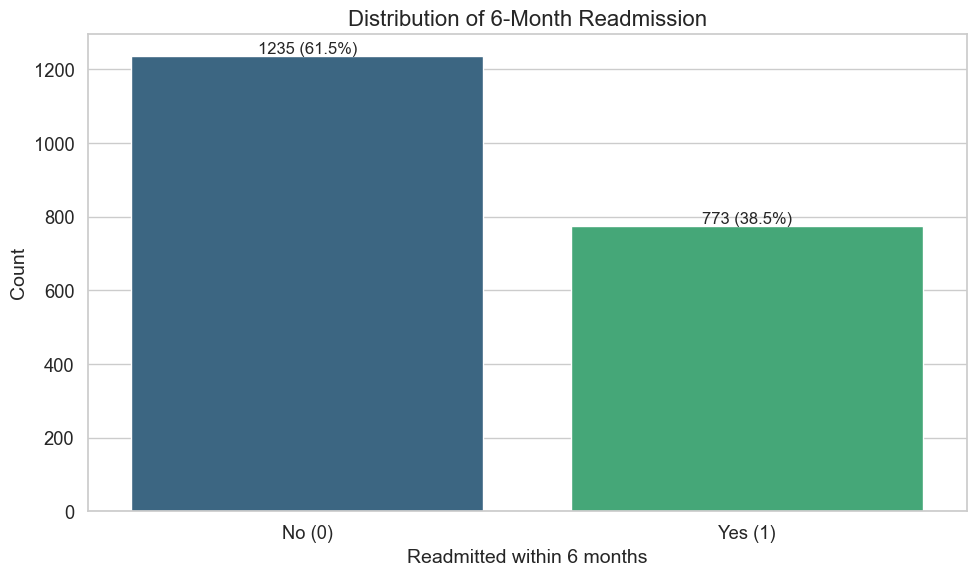

In [15]:
print("\n", "="*50)
print("Target Variable Analysis: re.admission.within.6.months")
print("="*50)

target_col = 're.admission.within.6.months'

# Plot target variable distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Distribution of 6-Month Readmission', fontsize=16)
plt.xlabel('Readmitted within 6 months', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count and percentage labels to the bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = (count / total) * 100
    ax.annotate(f'{int(count)} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=12)

plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


Clinical Variables Analysis


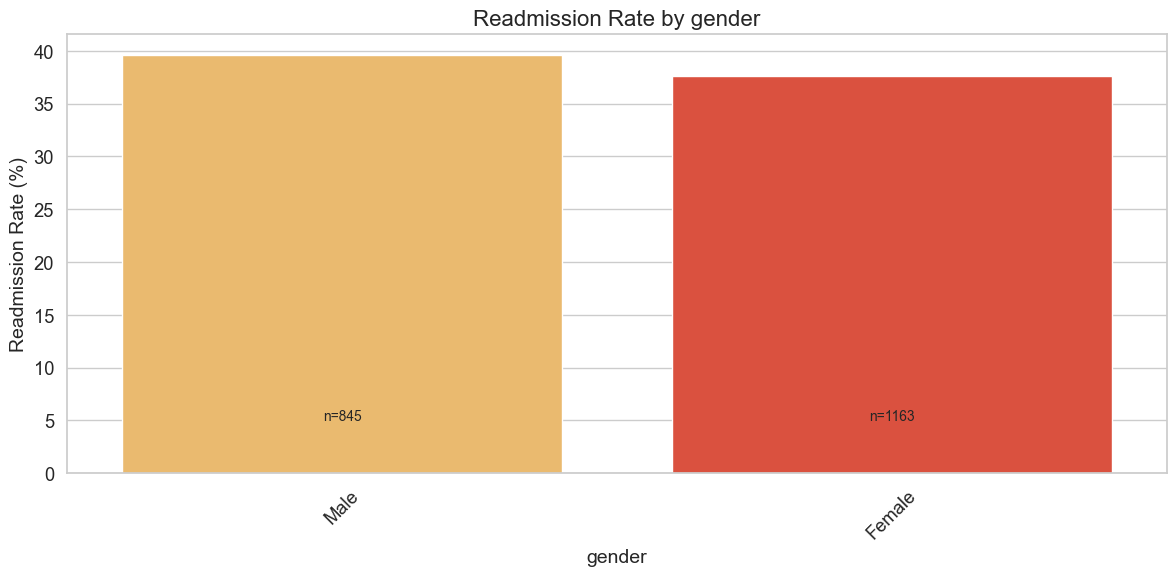


Readmission rates by gender:


re.admission.within.6.months,Readmission Rate (%)
gender,
Male,39.644970
Female,37.661221


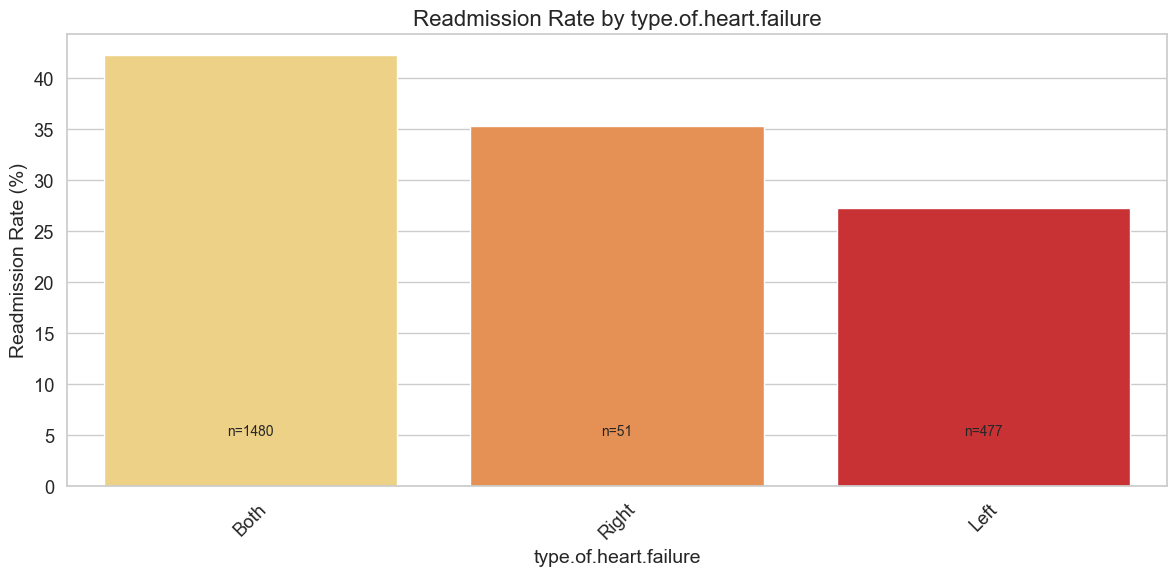


Readmission rates by type.of.heart.failure:


re.admission.within.6.months,Readmission Rate (%)
type.of.heart.failure,
Both,42.229730
Right,35.294118
Left,27.253669


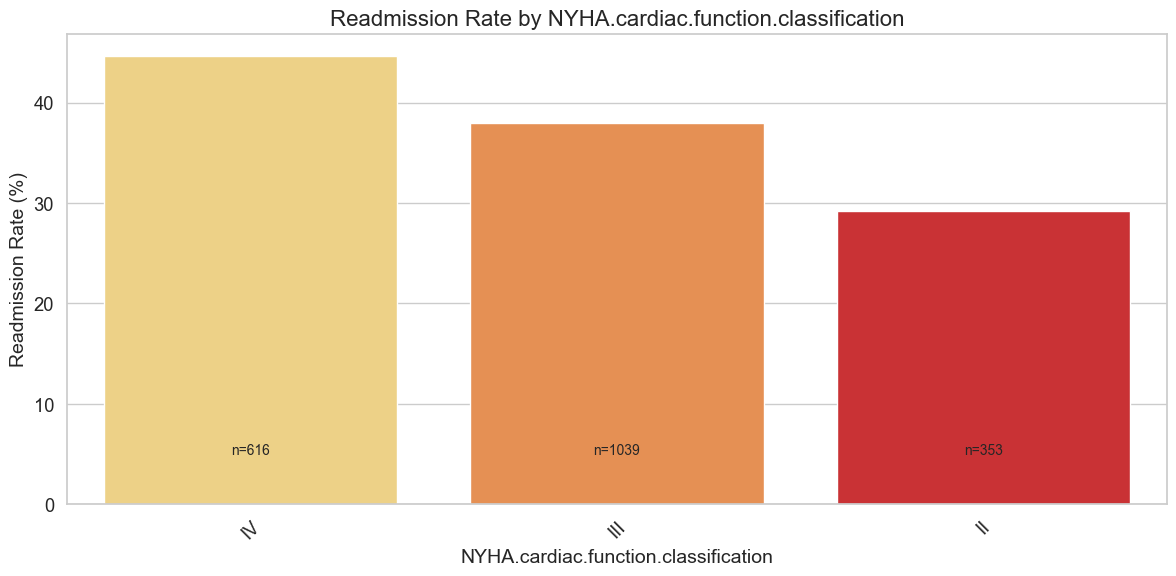


Readmission rates by NYHA.cardiac.function.classification:


re.admission.within.6.months,Readmission Rate (%)
NYHA.cardiac.function.classification,
IV,44.642857
III,38.017324
II,29.178470


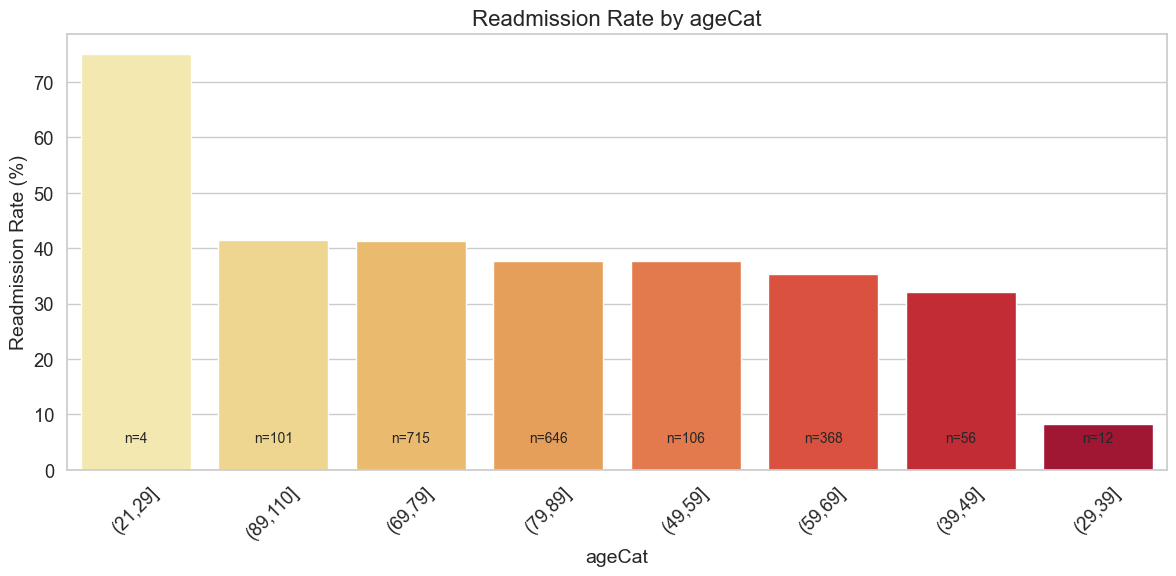


Readmission rates by ageCat:


re.admission.within.6.months,Readmission Rate (%)
ageCat,
"(21,29]",75.000000
"(89,110]",41.584158
"(69,79]",41.258741
"(79,89]",37.770898
"(49,59]",37.735849
"(59,69]",35.326087
"(39,49]",32.142857
"(29,39]",8.333333


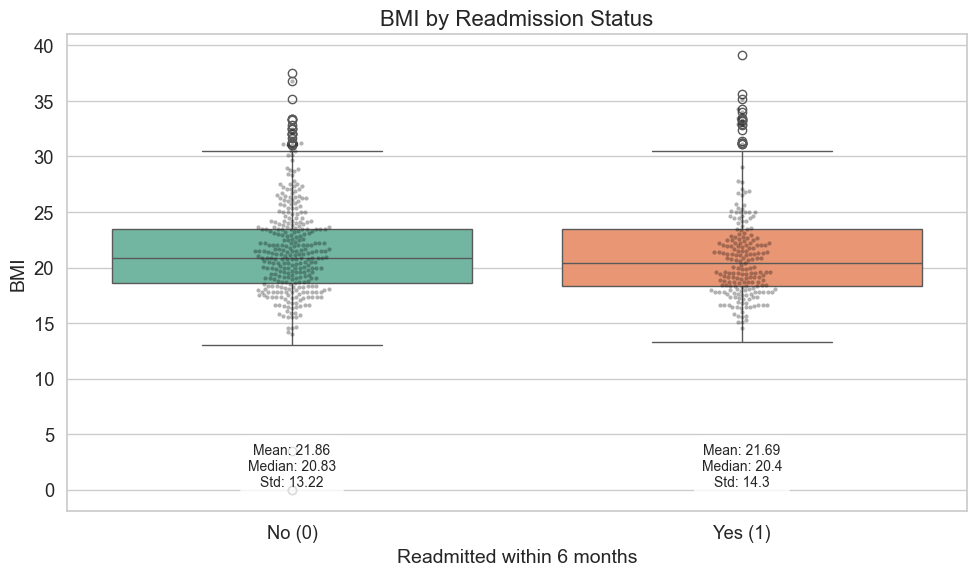


Statistics for BMI by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,21.86,20.83,13.22
1,21.69,20.40,14.30


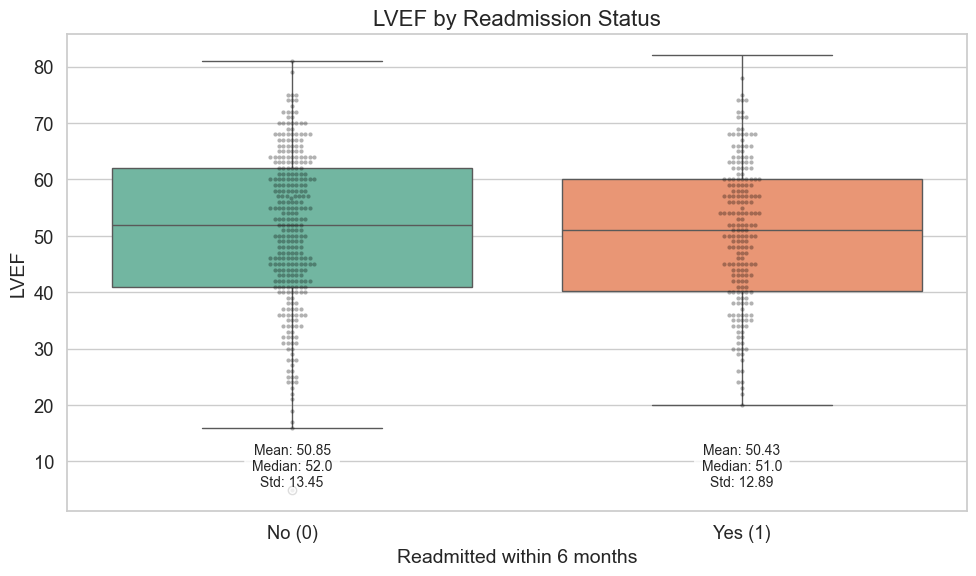


Statistics for LVEF by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,50.85,52.0,13.45
1,50.43,51.0,12.89


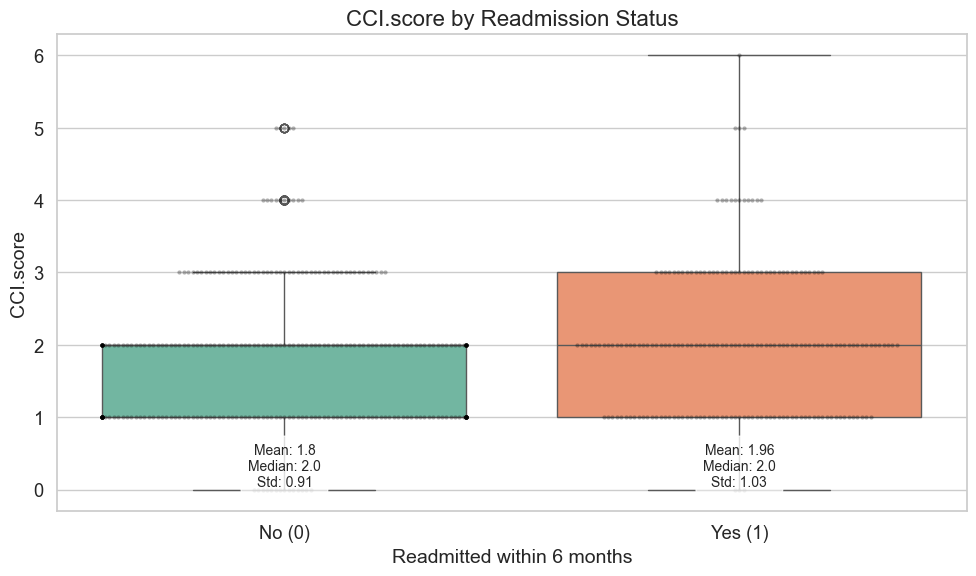


Statistics for CCI.score by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,1.80,2.0,0.91
1,1.96,2.0,1.03


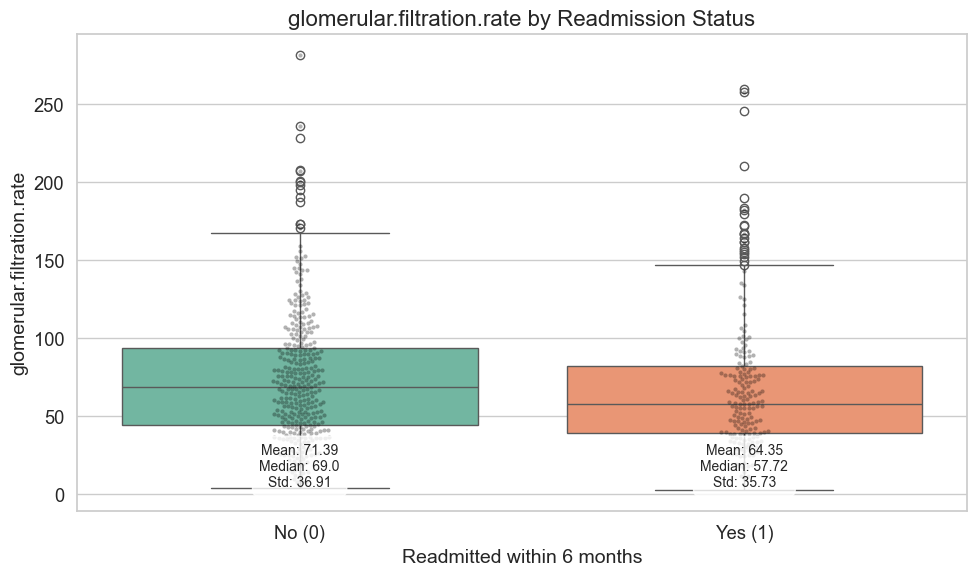


Statistics for glomerular.filtration.rate by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,71.39,69.00,36.91
1,64.35,57.72,35.73


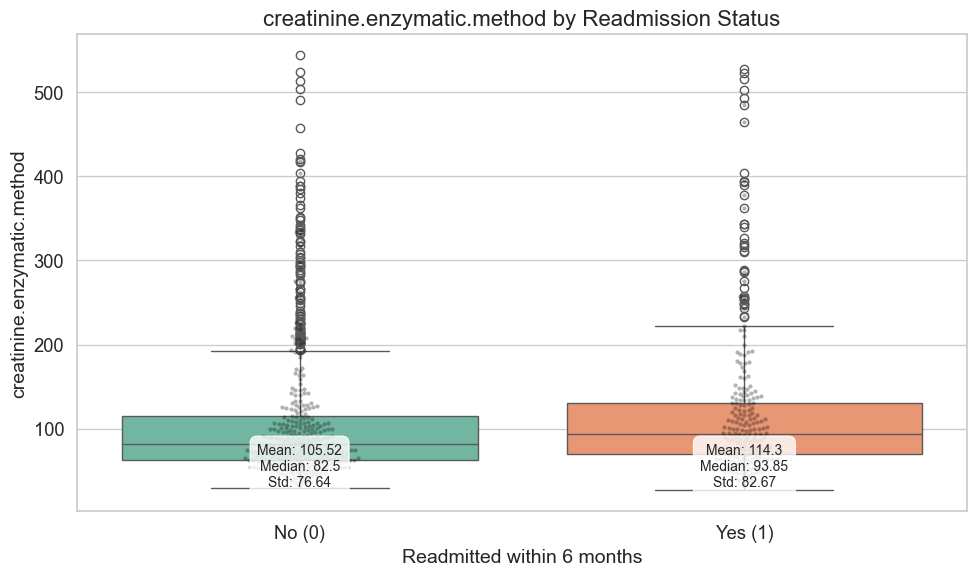


Statistics for creatinine.enzymatic.method by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,105.52,82.50,76.64
1,114.30,93.85,82.67


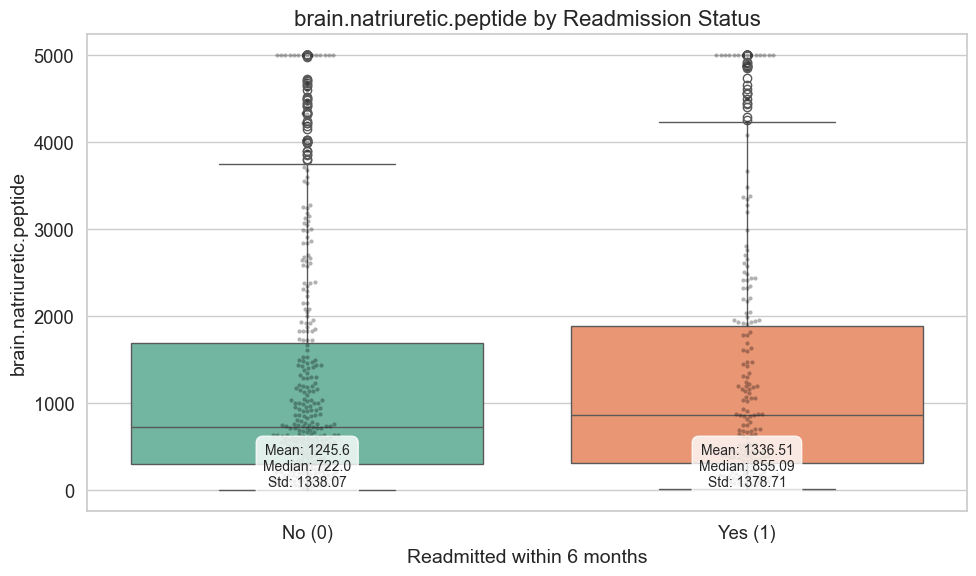


Statistics for brain.natriuretic.peptide by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,1245.60,722.00,1338.07
1,1336.51,855.09,1378.71


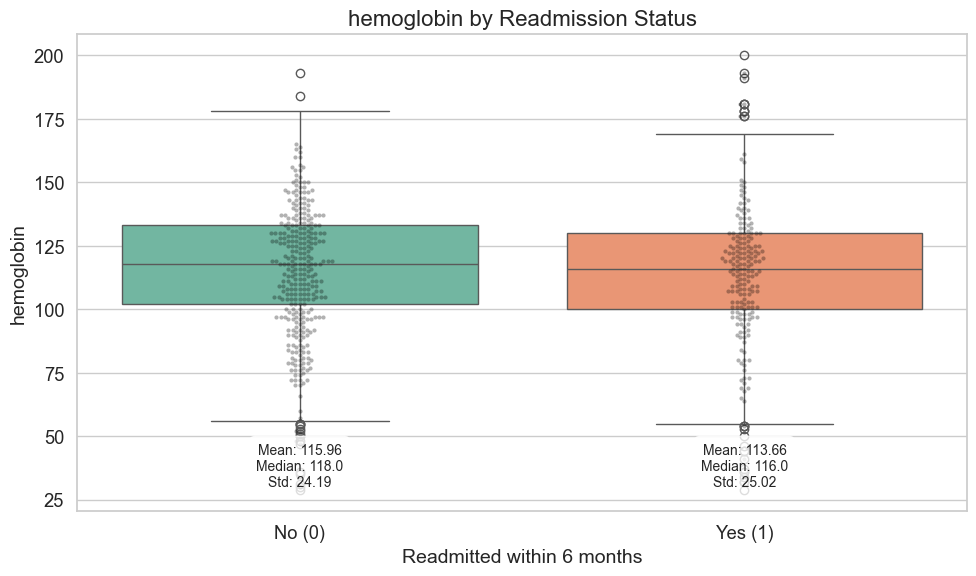


Statistics for hemoglobin by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,115.96,118.0,24.19
1,113.66,116.0,25.02


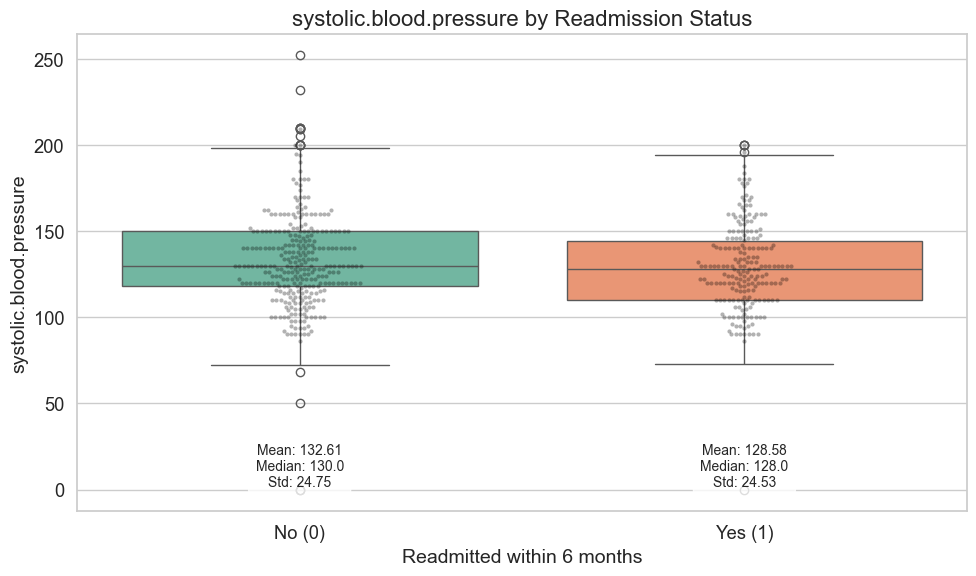


Statistics for systolic.blood.pressure by readmission status:


,mean,median,std
re.admission.within.6.months,,,
0,132.61,130.0,24.75
1,128.58,128.0,24.53


In [16]:
print("\n", "="*50)
print("Clinical Variables Analysis")
print("="*50)

# Define key categorical clinical variables
categorical_vars = [
    'gender', 
    'type.of.heart.failure', 
    'NYHA.cardiac.function.classification',
    'ageCat'
]

# Plot readmission rates by categorical variables
for var in categorical_vars:
    if var in df.columns:
        plt.figure(figsize=(12, 6))
        
        # Calculate readmission rates by category
        readmission_by_cat = pd.crosstab(
            df[var], 
            df[target_col], 
            normalize='index'
        ) * 100
        
        # Add count for each category
        category_counts = df[var].value_counts()
        readmission_by_cat['count'] = category_counts
        
        # Sort by readmission rate (optional)
        readmission_by_cat = readmission_by_cat.sort_values(1, ascending=False)
        
        # Prepare data for plotting
        plot_data = readmission_by_cat.reset_index()
        
        # Create bar plot
        ax = sns.barplot(x=var, y=1, data=plot_data, palette='YlOrRd')
        
        # Add count labels
        for i, row in plot_data.iterrows():
            count = row['count']
            ax.text(i, 5, f'n={count}', ha='center', fontsize=10)
        
        plt.title(f'Readmission Rate by {var}', fontsize=16)
        plt.xlabel(var, fontsize=14)
        plt.ylabel('Readmission Rate (%)', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print(f"\nReadmission rates by {var}:")
        display_df(readmission_by_cat[[1]].sort_values(1, ascending=False).rename(columns={1: 'Readmission Rate (%)'}))

# Define key numerical clinical variables
numerical_vars = [
    'BMI', 
    'LVEF', 
    'CCI.score', 
    'glomerular.filtration.rate',
    'creatinine.enzymatic.method',
    'brain.natriuretic.peptide',
    'hemoglobin',
    'systolic.blood.pressure'
]

# Compare numerical variables by readmission status with box plots
for var in numerical_vars:
    if var in df.columns:
        plt.figure(figsize=(10, 6))
        
        # Get data without outliers for better visualization
        q1 = df[var].quantile(0.05)
        q3 = df[var].quantile(0.95)
        iqr = q3 - q1
        df_plot = df[(df[var] >= q1 - 1.5 * iqr) & (df[var] <= q3 + 1.5 * iqr)]
        
        # Create box plot
        ax = sns.boxplot(x=target_col, y=var, data=df_plot, palette='Set2')
        
        # Add swarm plot for data points
        sns.swarmplot(x=target_col, y=var, data=df_plot.sample(min(500, len(df_plot))), 
                     color='black', alpha=0.3, size=3)
        
        # Calculate and display statistics
        stats = df.groupby(target_col)[var].agg(['mean', 'median', 'std']).round(2)
        
        # Add annotations
        for i, (idx, row) in enumerate(stats.iterrows()):
            ax.text(i, df_plot[var].min(), 
                   f"Mean: {row['mean']}\nMedian: {row['median']}\nStd: {row['std']}", 
                   ha='center', va='bottom', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
        
        plt.title(f'{var} by Readmission Status', fontsize=16)
        plt.xlabel('Readmitted within 6 months', fontsize=14)
        plt.ylabel(var, fontsize=14)
        plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
        plt.tight_layout()
        plt.show()
        
        print(f"\nStatistics for {var} by readmission status:")
        display_df(stats)



Feature Selection and Correlation Analysis

Top 20 features by correlation with readmission:


,Correlation
potassium.ion,0.108299
left.ventricular.end.diastolic.diameter.LV,0.096661
uric.acid,0.094975
moderate.to.severe.chronic.kidney.disease,0.087641
serum.magnesium,0.084890
...,...
cystatin,0.056564
eye.opening,0.054697
visit.times,0.054264
creatinine.enzymatic.method,0.054023



Bottom 20 features by correlation with readmission:


,Correlation
hematocrit.blood.gas,-0.057537
cholesterol,-0.059443
sodium.ion,-0.061962
map,-0.063113
red.blood.cell,-0.064122
...,...
glomerular.filtration.rate,-0.093686
Unnamed: 0,-0.114718
leukemia,NaN
cholinesterase,NaN


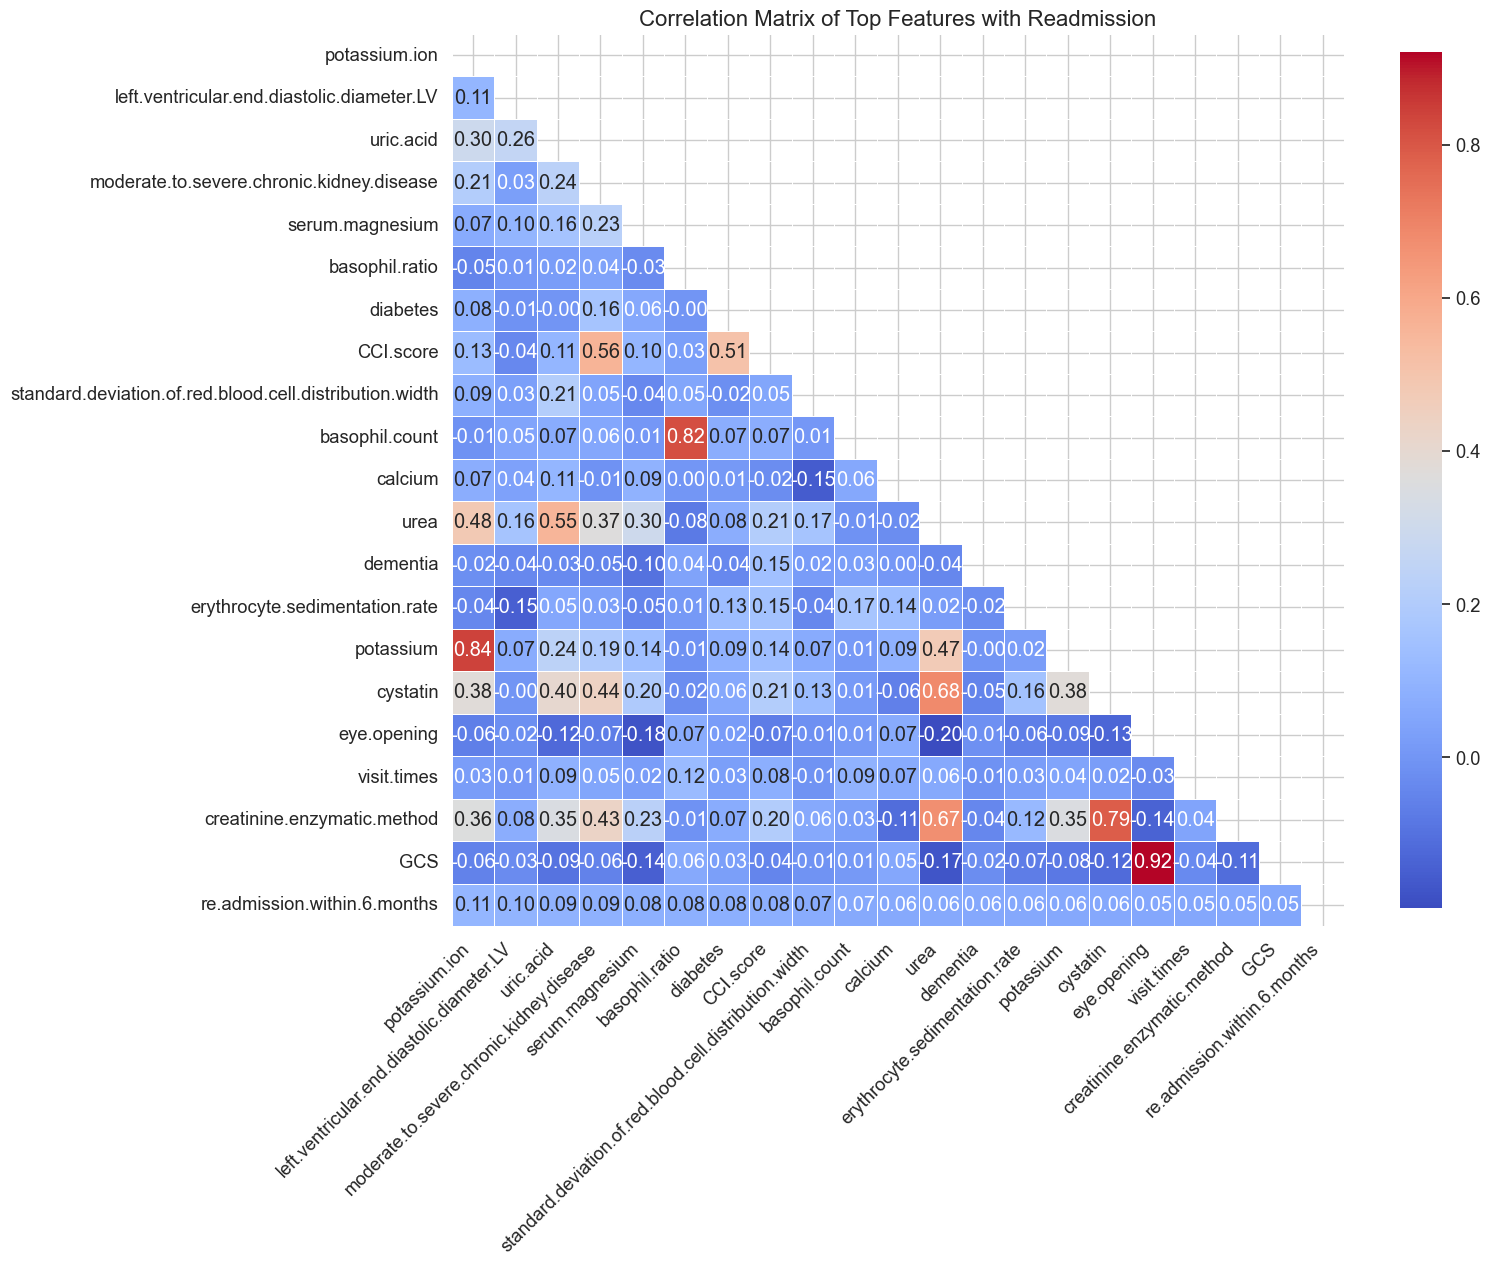

ValueError: Shape of passed values is (2008, 139), indices imply (2008, 140)

In [18]:
print("\n", "="*50)
print("Feature Selection and Correlation Analysis")
print("="*50)

# Remove non-numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Define columns to exclude from predictors (outcome variables and identifiers)
exclude_cols = [col for col in numerical_df.columns if 
                any(term in col for term in ['death.within', 're.admission.within', 
                                          'return.to.emergency', 'time.of.death',
                                          're.admission.time', 'time.to.emergency']) or
                col in ['', 'inpatient.number', 'dischargeDay']]

# Select predictor columns
predictor_cols = [col for col in numerical_df.columns if col not in exclude_cols and col != target_col]

# Calculate correlation with target
correlations = numerical_df[predictor_cols + [target_col]].corr()[target_col].sort_values(ascending=False)

print("\nTop 20 features by correlation with readmission:")
display_df(correlations.drop(target_col).head(20).to_frame().rename(columns={target_col: 'Correlation'}))

print("\nBottom 20 features by correlation with readmission:")
display_df(correlations.drop(target_col).tail(20).to_frame().rename(columns={target_col: 'Correlation'}))

# Plot correlation matrix with target variable (top 20 features)
plt.figure(figsize=(16, 14))
top_features = list(correlations.drop(target_col).head(20).index)
top_features.append(target_col)  # Add target variable

# Create correlation matrix
corr_matrix = numerical_df[top_features].corr()

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Top Features with Readmission', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Apply feature selection using ANOVA F-value (for binary classification)
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(numerical_df[predictor_cols]), columns=predictor_cols)
y = numerical_df[target_col]

# Select top k features
k = 20
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)

# Get selected feature names
feature_indices = selector.get_support(indices=True)
selected_features = [predictor_cols[i] for i in feature_indices]

# Get scores
scores = pd.DataFrame({
    'Feature': predictor_cols,
    'Score': selector.scores_
})
scores = scores.sort_values('Score', ascending=False)

print("\nTop 20 features selected by ANOVA F-test:")
display_df(scores.head(20))

# Plot feature importance
plt.figure(figsize=(14, 10))
sns.barplot(x='Score', y='Feature', data=scores.head(20), palette='viridis')
plt.title('Top 20 Features by ANOVA F-test Score', fontsize=16)
plt.xlabel('F-test Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()
